In [1]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)

In [2]:
import psycopg2

conn = psycopg2.connect(host=get_secret('postgresql')['host'],
                      user=get_secret('postgresql')['username'],
                      password = get_secret('postgresql')['password'],
                      dbname=get_secret('postgresql')['engine'])

cur = conn.cursor()

In [13]:
sql = """
     select * from population
     where fips = '12'
     """

In [19]:
import pandas as pd

va_df = pd.read_sql(sql, con=conn)
va_df

/tmp/ipykernel_14378/338280960.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  va_df = pd.read_sql(sql, con=conn)


,fips,pop,year
0,12,17382511,2005
1,12,18089889,2006
2,12,18251243,2007
3,12,18328340,2008
4,12,18537969,2009
5,12,18843326,2010
6,12,19057542,2011
7,12,19317568,2012
8,12,19552860,2013
9,12,19893297,2014


In [16]:
! pip install jupyter-ai-magics[all] -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
safety-schemas 0.0.14 requires pydantic<2.10.0,>=2.6.0, but you have pydantic 2.11.9 which is incompatible.
sparkmagic 0.21.0 requires pandas<2.0.0,>=0.17.1, but you have pandas 2.2.3 which is incompatible.


In [17]:
import os
os.environ["OPENAI_API_KEY"] = get_secret('openai')['api_key']

In [18]:
%load_ext jupyter_ai_magics

In [24]:
%%ai gpt4
create python code that creates a line graph with x = Year and y = Population growth rate for FIPS = 12

Below is the markdown version of the Python code that creates a line graph with x = Year and y = Population growth rate for FIPS = 12. Please note that the code can only be run in a Python environment, not in a markdown environment.

```python
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame
df = pd.DataFrame({
    'fips': 12,
    'pop': [17382511, 18089889, 18251243, 18328340, 18537969, 18843326,
            19057542, 19317568, 19552860, 19893297, 20271272, 20612439,
            20984400, 21299325, 21477737], 
    'year': [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
             2015, 2016, 2017, 2018, 2019]
})

# Select data for FIPS = 12
df_fips12 = df[df['fips'] == 12]

# Calculate Population growth rate 
df_fips12['pop_growth_rate'] = df_fips12['pop'].pct_change()

# Plotting
plt.figure(figsize=(10,6))
plt.plot(df_fips12['year'], df_fips12['pop_growth_rate'])
plt.xlabel('Year')
plt.ylabel('Population Growth Rate')
plt.title('Population Growth Rate for FIPS = 12 Over The Years')
plt.grid(True)
plt.show()
```
This Python code first imports `matplotlib.pyplot` and `pandas`, which are necessary to draw the graph and manipulate the data. It then creates a DataFrame 'df'. It selects the rows of the DataFrame where 'fips' equals 12. The `pct_change()` function calculates the population growth rate. This new DataFrame is plotted, with 'year' as the x-values and 'pop_growth_rate' as the y-values. Finally, it adds labels and a title to the graph, enables the grid, and displays the graph.

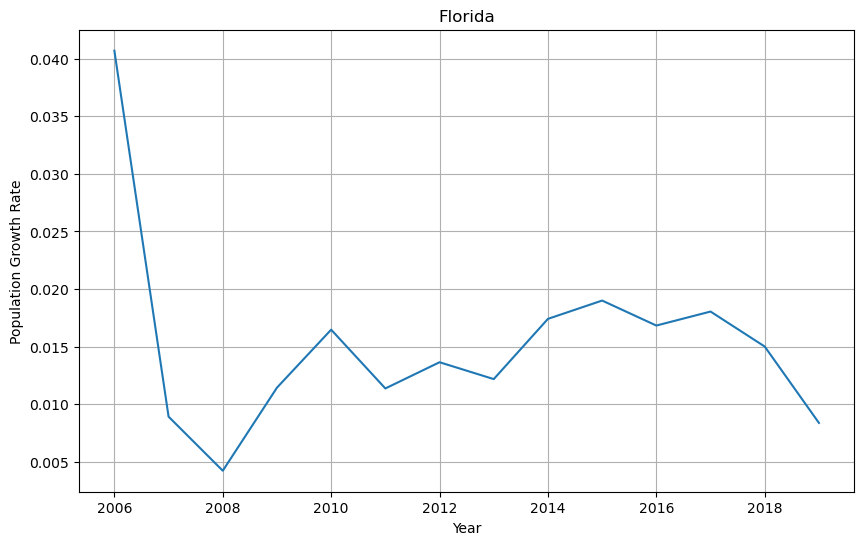

In [25]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame
df = pd.DataFrame({
    'fips': 12,
    'pop': [17382511, 18089889, 18251243, 18328340, 18537969, 18843326,
            19057542, 19317568, 19552860, 19893297, 20271272, 20612439,
            20984400, 21299325, 21477737], 
    'year': [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
             2015, 2016, 2017, 2018, 2019]
})

# Select data for FIPS = 12
df_fips12 = df[df['fips'] == 12]

# Calculate Population growth rate 
df_fips12['pop_growth_rate'] = df_fips12['pop'].pct_change()

# Plotting
plt.figure(figsize=(10,6))
plt.plot(df_fips12['year'], df_fips12['pop_growth_rate'])
plt.xlabel('Year')
plt.ylabel('Population Growth Rate')
plt.title('Florida')
plt.grid(True)
plt.show()